In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ds_jobs_data_cleaned.csv')

In [3]:
# df with only disclosed salary information
salary_df = df[df['Salary_disclosed'] == 1]

Text(0, 0.5, 'Frequency')

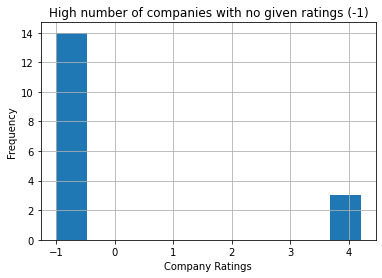

In [30]:
ax = df.Rating.hist()
ax.set_title('High number of companies with no given ratings (-1)')
ax.set_xlabel('Company Ratings')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

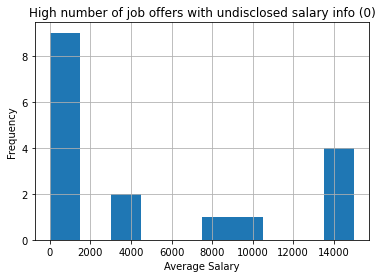

In [29]:
ax = df.Avg_salary.hist()
ax.set_title('High number of job offers with undisclosed salary info (0)')
ax.set_xlabel('Average Salary')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

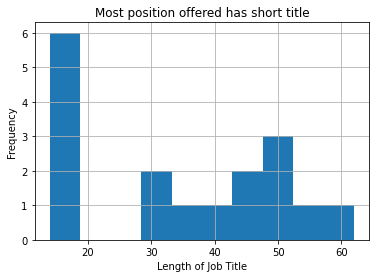

In [28]:
ax = df.Title_len.hist()
ax.set_title('Most position offered has short title')
ax.set_xlabel('Length of Job Title')
ax.set_ylabel('Frequency')

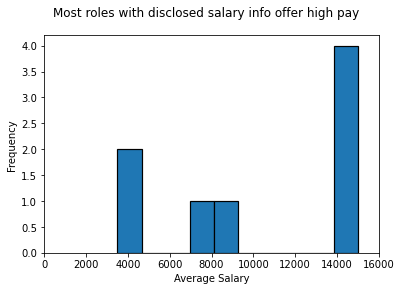

In [22]:
fig = plt.figure()
plt.hist(salary_df.Avg_salary, edgecolor='black', linewidth=1.2)
fig.suptitle('Most roles with disclosed salary info offer high pay')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
ticks = range(0, 18000, 2000)
labels = ticks
plt.xticks(ticks, labels)
plt.show()

Text(0, 0.5, 'Number of reposts')

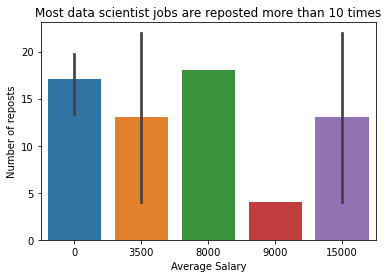

In [23]:
ax = sns.barplot(x='Avg_salary', y='Repost', data=df)
ax.set_title('Most data scientist jobs are reposted more than 10 times')
ax.set_xlabel('Average Salary')
ax.set_ylabel('Number of reposts')

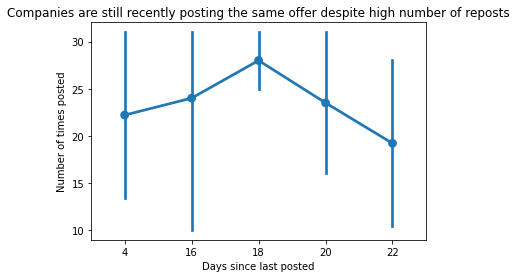

In [24]:
ax = sns.pointplot(x='Repost', y='Days_since_posted' , data=df, markers=[ 'o' ],)
ax.set(title= 'Companies are still recently posting the same offer despite high number of reposts',
       xlabel='Days since last posted', ylabel='Number of times posted')
plt.show()

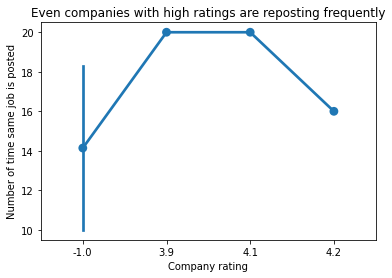

In [25]:
ax = sns.pointplot(x='Rating', y='Repost' , data=df, markers=[ 'o' ],)
ax.set(title='Even companies with high ratings are reposting frequently',
       xlabel='Company rating', ylabel='Number of time same job is posted')
plt.show()

In [12]:
df[['Rating', 'Avg_salary', 'Title_len', 'Repost']].corr()

,Rating,Avg_salary,Title_len,Repost
Rating,1.000000,-0.368516,-0.403054,0.232017
Avg_salary,-0.368516,1.000000,0.637505,-0.262848
Title_len,-0.403054,0.637505,1.000000,-0.219745
Repost,0.232017,-0.262848,-0.219745,1.000000


<AxesSubplot:>

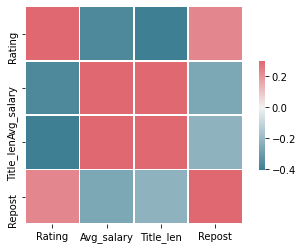

In [13]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df[['Rating', 'Avg_salary', 'Title_len', 'Repost']].corr(), vmax=.3, center=0,
           cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

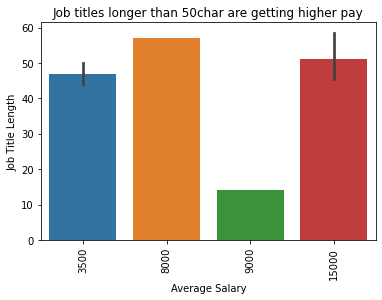

In [26]:
chart = sns.barplot(x=salary_df.Avg_salary, y=salary_df.Title_len)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set(title='Job titles longer than 50char are getting higher pay',
       xlabel='Average Salary', ylabel='Job Title Length')
plt.show()

Graph for Title frequency: total = 11


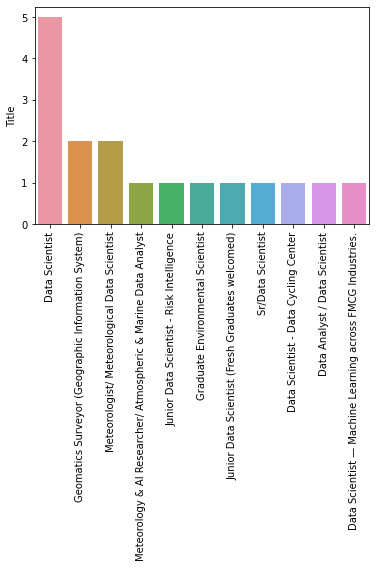

Graph for Company frequency: total = 13


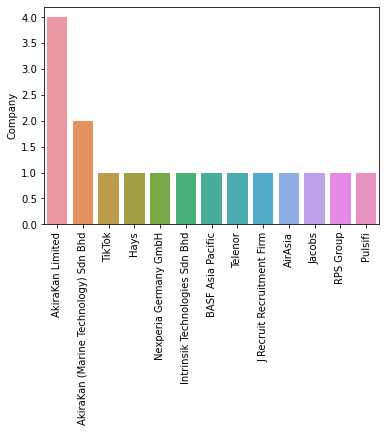

In [27]:
df_cat = df[['Title', 'Company',]]
df_num = df[['Rating', 'Days_since_posted', 'Avg_salary', 'Title_len', 'Repost']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s frequency: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [17]:
pd.pivot_table(salary_df, index = 'Title', values = 'Avg_salary')

,Avg_salary
Title,
Data Scientist,9000
Data Scientist — Machine Learning across FMCG Industries.,8000
Geomatics Surveyor (Geographic Information System),9250
Junior Data Scientist (Fresh Graduates welcomed),15000
Meteorologist/ Meteorological Data Scientist,9250
Meteorology & AI Researcher/ Atmospheric & Marine Data Analyst,15000


In [18]:
pd.pivot_table(df, index = ['Rating', 'Company'], values = 'Avg_salary')

Avg_salary
Rating Company                                         
-1.0   AkiraKan (Marine Technology) Sdn Bhd        3500
       AkiraKan Limited                           15000
       Hays                                           0
       Intrinsik Technologies Sdn Bhd                 0
       J Recruit Recruitment Firm                  8000
       Nexperia Germany GmbH                          0
       Pulsifi                                     9000
       RPS Group                                      0
       Telenor                                        0
       TikTok                                         0
 3.9   Jacobs                                         0
 4.1   BASF Asia Pacific                              0
 4.2   AirAsia                                        0

In [19]:
pd.pivot_table(salary_df, index = ['Avg_salary', ], values = 'Repost')

,Repost
Avg_salary,
3500,13
8000,18
9000,4
15000,13


In [20]:
pd.pivot_table(salary_df, index=['Company', 'Title', 'Repost',], values='Days_since_posted')

Days_since_posted
Company                              Title                                              Repost                   
AkiraKan (Marine Technology) Sdn Bhd Geomatics Surveyor (Geographic Information System) 4                      31
                                     Meteorologist/ Meteorological Data Scientist       22                     31
AkiraKan Limited                     Geomatics Surveyor (Geographic Information System) 4                       9
                                     Junior Data Scientist (Fresh Graduates welcomed)   22                      9
                                     Meteorologist/ Meteorological Data Scientist       22                      9
                                     Meteorology & AI Researcher/ Atmospheric & Mari... 4                       9
J Recruit Recruitment Firm           Data Scientist — Machine Learning across FMCG I... 18                     25
Pulsifi                              Data Scientist                                     4                      31

In [21]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
nltk.download('punkt')

In [32]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

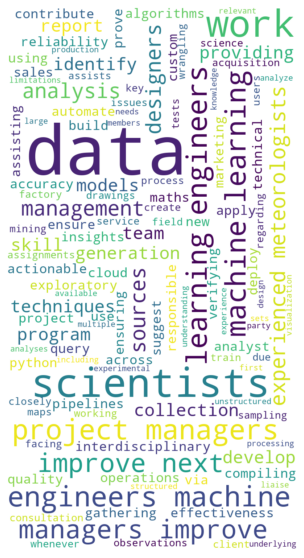

In [33]:
words = " ".join(df['Summary'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()